# Car Insurance Prediction

## Problem Statement

Imagine you are a data scientist at a bank in your city. Your bank besides usual services also provides car insurance services. The bank has potential customers data and bank employees call them for advertising available car insurance options.

You are provided with general information about clients (age,job,etc.) as well as more specific information about the current insurance sell campaign (communication,last contact day) and previous campaign (attributes like previous attempts,outcome etc).

You have data about 3100 customers who were contacted during the last campaign and for whom the results of the campaign (if the customer bought insurance or not) are known.

## Objective

You are provided 935 customers data who were contacted during the current campaign. You are required to build a machine learning model to predict if these customers will buy the car insurance or not

## Evaluation Criteria

Submissions are evaluated using 100 * Accuracy Score.

## About the Data
There are 19 variables (including the target variable) in the train dataset. Below are some of the listed variables and their description:

**age**: age of the customer

**job_type**: what job does customer do

**marital_status**: if the customer is married or not

**education_level**: education level of the customer

**default_or_not**: if the customer was able to repay in time or not

**balance_amt**: balance amount of the customer in the bank

**household_insurance**: if the customer has bought household insurance or not

**car_loan**: if the customer has car loan

**communication**: mode of communication

**last_contact_day**: when the customer was last contacted (day)

**last_contact_month**: when the customer was last contacted (month)

**no_of_contacts**: How many times was the customer contacted

**days_passed**: days passed since the last contact (-1 means the data is missing)

**prev_attempt**s: how many times was the customer previously contacted 

**outcome**: what was the outcome of the last contact

**call_start**: call start time

**call_end**: call end time

**car_insurance**: if the customer bought car insurance (the target variable, 1 - boutght, 0 - not bought)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Train_data.csv", parse_dates=['last_contact_day', 'last_contact_month', 'call_start', 'call_end'])
test = pd.read_csv("/content/Test_data.csv", parse_dates=['last_contact_day', 'last_contact_month', 'call_start', 'call_end'])

In [ ]:
train.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,2021-04-15 10:22:20,2021-04-15 10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,2021-04-15 09:06:30,2021-04-15 13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,2021-04-15 13:18:41,2021-04-15 13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,2021-04-15 10:09:18,2021-04-15 10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,2021-04-15 12:12:30,2021-04-15 12:27:14,1


In [ ]:
train.shape, test.shape

((3102, 18), (935, 17))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  3102 non-null   float64       
 1   job_type             3091 non-null   object        
 2   marital_status       3102 non-null   object        
 3   education_level      2989 non-null   object        
 4   default_or_not       3102 non-null   int64         
 5   balance_amt          3102 non-null   float64       
 6   household_insurance  3102 non-null   int64         
 7   car_loan             3102 non-null   int64         
 8   communication        2559 non-null   object        
 9   last_contact_day     3102 non-null   object        
 10  last_contact_month   3102 non-null   object        
 11  no_of_contacts       3102 non-null   int64         
 12  days_passed          3102 non-null   int64         
 13  prev_attempts        3102 non-nul

In [ ]:
train.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

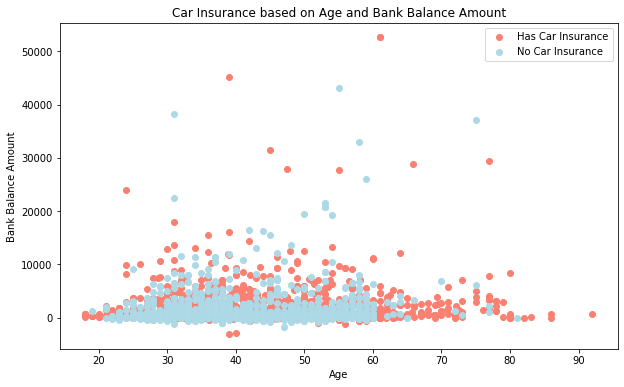

In [ ]:
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(train.age[train.car_insurance==1], 
            train.balance_amt[train.car_insurance==1], 
            c="salmon") 
# Negative examples
plt.scatter(train.age[train.car_insurance==0], 
            train.balance_amt[train.car_insurance==0], 
            c="lightblue") 

plt.title("Car Insurance based on Age and Bank Balance Amount")
plt.xlabel("Age")
plt.legend(["Has Car Insurance", "No Car Insurance"])
plt.ylabel("Bank Balance Amount");

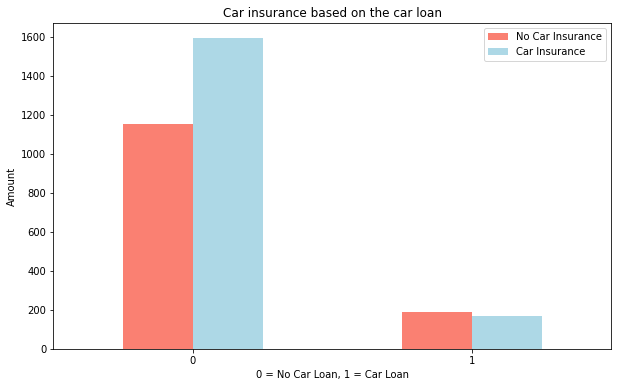

In [ ]:
pd.crosstab(train.car_loan, train.car_insurance).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Car insurance based on the car loan")
plt.xlabel("0 = No Car Loan, 1 = Car Loan")
plt.ylabel("Amount")
plt.legend(["No Car Insurance", "Car Insurance"])
plt.xticks(rotation=0);

In [ ]:
def process_df(df):
    # Drop Outcome and Communication since there are many missing values
    df.drop(['Outcome', 'communication'], axis=1, inplace=True)

    # Fill the missing values of job_type as unemployed.
    df['job_type'].fillna('unemployed', inplace=True)

    # Get dummies for job_type
    df = pd.get_dummies(df, columns=['job_type'], prefix='job_')

    # Fill the missing value of education_level with the most frequent 'secondary'
    df['education_level'].fillna('secondary', inplace=True)

    # Getting dummies for the education_level & marital_status
    df = pd.get_dummies(df, columns=['education_level'], prefix='edu_level_')
    df = pd.get_dummies(df, columns=['marital_status'], prefix='marital_')

    # Handling the call durations and converting them to only show minutes of total contact time.
    df['duration'] = df['call_end'] - df['call_start']
    df['duration'] = df['duration'].dt.total_seconds()/60.0
    df['last_contact_month'] = df['last_contact_month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
    
    # Dropping the handled columns
    df.drop(['call_start', 'call_end', 'last_contact_day', 'last_contact_month'], axis=1, inplace=True)
    
    # Convert age from float to int
    df['age'] = df['age'].astype(int)
    return df

In [ ]:
train = process_df(train)
test = process_df(test)

## Modeling


In [ ]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [ ]:
X = train.drop('car_insurance', axis=1)
y = train['car_insurance'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2481, 26), (621, 26), (2481,), (621,))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(criterion='entropy'),
          "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
          "Extra Trees Classifier": ExtraTreesClassifier(criterion='entropy'),
          "SVM": SVC(kernel='linear'),
          "Kernel SVM": SVC(kernel='rbf'),
          "XGBoost": XGBClassifier(),
          "Gaussian Naive Bayes": GaussianNB()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict the test data
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = accuracy_score(y_test, y_pred)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(dt_clf, X, y, cv=5)
scores.mean()

0.8191558880058178

In [ ]:
df_grid = {"max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

rs_df = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=df_grid,
                           cv=cv,
                           n_iter=20,
                           verbose=True)

rs_df.fit(X_train, y_train)
random_result = rs_df.fit(X_train, y_train)


Fitting 30 folds for each of 20 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 30 folds for each of 20 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    4.3s finished


In [ ]:
rs_df.score(X_test, y_test)

0.8276972624798712

In [ ]:
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.821582 using {'min_samples_split': 8, 'min_samples_leaf': 19, 'max_depth': 10}


In [ ]:
# Predict the test set
y_pred = rs_df.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.828


### AdaBoost Classifier

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada_clf, X, y, cv=5)
scores.mean()

0.835912420134019

In [ ]:
ada_grid = {"n_estimators": [10, 50, 100, 500],
           "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

ada_clf_grid = GridSearchCV(AdaBoostClassifier(), 
                            param_grid=ada_grid, 
                            cv=cv, 
                            scoring='accuracy', 
                            n_jobs=-1)

grid_result = ada_clf_grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.841060 using {'learning_rate': 0.1, 'n_estimators': 500}


In [ ]:
# Predict the test set
y_pred = ada_clf_grid.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.839


### Random Forest Classifier


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(rf_clf, X, y, cv=5)
scores.mean()

0.8478453067373124

In [ ]:
## Randomized Search CV - RandomForestClassifier()
# Setup random seed
np.random.seed(42)

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf.score(X_test, y_test)

0.8518518518518519

In [ ]:
print("Best: %f using %s" % (rs_rf.best_score_, rs_rf.best_params_))

Best: 0.845215 using {'n_estimators': 510, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# Predict the test set
y_pred = rs_rf.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.852


### Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier()

params_gbc = {
    'max_depth': [2,3,4],
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'max_features': ['log2','auto','sqrt'],
    'min_samples_leaf': [2,10,30]
}

grid_gbc = GridSearchCV(estimator=GBC,
                       param_grid=params_gbc,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

In [ ]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print("Best: %f using %s" % (grid_gbc.best_score_, grid_gbc.best_params_))

Best: 0.856100 using {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200}


In [ ]:
# Extract the best estimator
best_model = grid_gbc.best_estimator_
print(best_model)

# Predict the test set
y_pred = grid_gbc.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Test set accuracy score: 0.873


### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_test, y_test)

0.8470209339774557

In [ ]:
params_xgb = {
    'max_depth': np.arange(1, 11, 1),
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'max_features': ['log2','auto','sqrt'],
    'min_samples_leaf': [2,10,30],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'sub_sample': np.arange(0.1, 1.1, 0.1),
    'colsample_bytree': np.arange(0.1, 1.1, 0.1)
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [ ]:
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=params_xgb,
                           cv=cv,
                           n_iter=20,
                           verbose=True)
rs_xgb.fit(X_train, y_train)

Fitting 30 folds for each of 20 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.7min finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objecti...
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
    

In [ ]:
rs_xgb.fit(X_train, y_train)
print("Best: %f using %s" % (rs_xgb.best_score_, rs_xgb.best_params_))

Fitting 30 folds for each of 20 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.5min finished


Best: 0.853958 using {'sub_sample': 0.4, 'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7000000000000001}


In [ ]:
# Predict the test set
y_pred = rs_xgb.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print('Test set accuracy score: {:.3f}'.format(accuracy))

Test set accuracy score: 0.862


In [ ]:
# test = sc.fit_transform(test)

In [ ]:
target = grid_gbc.predict(test)


In [ ]:
prediction = pd.DataFrame(target)
prediction.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
prediction.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>